## 7.Write a program to implement Support vector machine for the given data set data and apply this knowledge to classify a new sample 

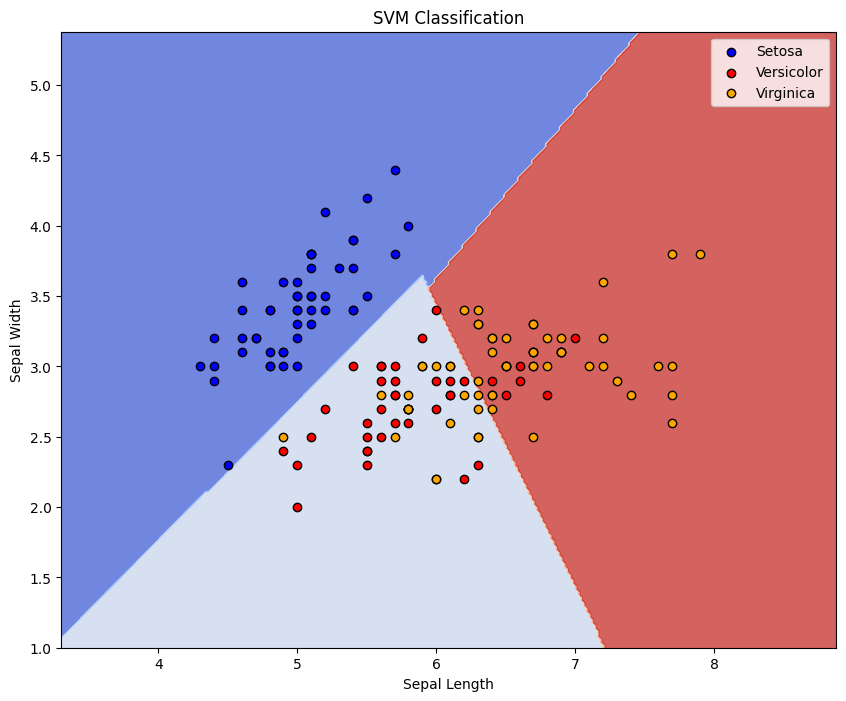

Accuracy Score on Training Data: 82.00%

Confusion Matrix for Training Data:
[[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]

Predicted Class for the Sample: 'virginica'


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
x = iris.data[:, :2]
y = iris.target

model = svm.SVC(kernel='linear')
model.fit(x, y)
predictions = model.predict(x)

new_sample = np.array([[6.7, 3.1]])
new_prediction = model.predict(new_sample)
predicted_class_name = iris.target_names[new_prediction[0]]

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='blue', label='Setosa', edgecolors='k')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='red', label='Versicolor', edgecolors='k')
plt.scatter(x[y == 2][:, 0], x[y == 2][:, 1], color='orange', label='Virginica', edgecolors='k')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Classification')
plt.legend()
plt.show()

print(f"Accuracy Score on Training Data: {accuracy_score(y, predictions) * 100:.2f}%")
print("\nConfusion Matrix for Training Data:")
cm = confusion_matrix(y, predictions)
print(cm)

print(f"\nPredicted Class for the Sample: '{predicted_class_name}'")